In [3]:
import tensorflow as tf

In [4]:
import PIL
import matplotlib.pyplot as plt
import imageio
import numpy as np
from skimage import color
from PIL import Image
import pandas as pd

In [5]:
#IF INPUT IS JUST NUMBERS: DIGITMODEL
#IF INPUT IS JUST LETTERS: LETTERMODEL
#IF INPUT CONTAINS BOTH: Model
model = tf.keras.models.load_model('Model')


In [6]:
#Digits: 0, 1, 2, ..., 9 (classes 0 to 9)
#Uppercase letters: A, B, C, ..., Z (classes 10 to 35)
#Lowercase letters: a, b, c, ..., z (classes 36 to 61)

In [7]:
#This converts the output the model gives you into the actual prediction
def predDict(num):
  df = pd.read_excel("./Dictionary.xlsx", sheet_name=0)
  data_dict = dict(zip(df['Numbers'], df['Symbols']))
  return data_dict[num]


In [8]:
#image must be a PIL image
def preprocess(image):
    image = image.resize((28, 28), resample=Image.BILINEAR)
    image = np.asarray(image)
    image = color.rgb2gray(image)
    if image[0][0] == 1:
        image = 1 - image
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    return image

1/1 [==============================] - 0s 21ms/step


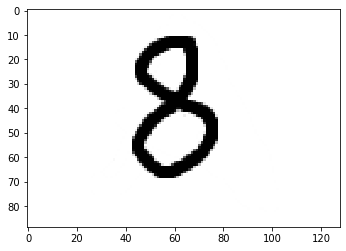

In [12]:
image = Image.open('/Users/jackl/Documents/AIPRAC/enigma-ocr/Test Data/8white.png')
plt.imshow(image)
image = preprocess(image)
y_pred = model.predict(image)


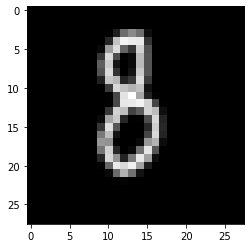

In [11]:
plt.imshow(np.squeeze(image),cmap='gray')

In [10]:
#returns result
y_pred_class = np.argmax(y_pred, axis=-1)
predDict(y_pred_class[0])

8